# Load Packages

In [1]:
import Pkg; Pkg.add("Distributions")
using Printf, Statistics, StatsBase, Random, Distributions
include("printmat.jl")
Random.seed!(678)          #set the random number generator to this starting point

    Updating registry at `~/.julia/registries/General`


┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36


┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


MersenneTwister(678)

In [2]:
using Plots

gr(size=(480,320))
default(fmt = :svg)

# Introduction

This exam explores how autocorrelation ought to change how we test statistical hypotheses.

# Task 1

Code a function for simulating $T$ observations from an AR(1) series

$
y_t = (1-\rho)\mu + \rho y_{t-1} + \varepsilon_t \sigma
$
where $\varepsilon_t$ is N(0,1).

That is, generate $y_1,y_2,...,y_T$ from this formula.

To make also the starting value ($y_0$) random, simulate $T+100$ data points, but then discard the first 100 values of $y_t$.

Generate a single "sample" using `(T,ρ,σ,μ) = (500,0,3,2)`. Calculate and report the average (mean) and the first 5 autocorrelations (hint: `autocor()`) of this sample. Redo a 2nd time, but with `ρ=0.75`.

In [3]:
function SimAR1(T,ρ,σ,μ)
  dist = Normal()
  y = [0.0 for i = 1:(T+100)]
  noise = rand(dist, T+100)

  for i in 1:(T+100-1)
    y[i+1] = (1-ρ) * μ + ρ * y[i] + noise[i+1] * σ
  end

  return y[101:(T+100)]
end

SimAR1 (generic function with 1 method)

In [4]:
## ρ=0
(T,ρ,σ,μ) = (500,0,3,2)

y = SimAR1(T,ρ,σ,μ)

plags = 1:5
autocorrelations = autocor(y, plags)

println("average from one sample with ρ=0: ", round(mean(y), digits=3))

println("\nautocorrelations with ρ=0")
printmat([i for i=1:5],[autocorrelations[i] for i=1:5])

average from one sample with ρ=0: 1.86

autocorrelations with ρ=0
     1         0.005
     2        -0.012
     3         0.024
     4         0.057
     5         0.074


In [5]:
## ρ=0.75
(T,ρ,σ,μ) = (500,0.75,3,2)

y = SimAR1(T,ρ,σ,μ)

plags = 1:5
autocorrelations = autocor(y, plags)

println("average from one sample with ρ=0.75: ", round(mean(y), digits=3))

println("\nautocorrelations with ρ=0.75")
printmat([i for i=1:5],[autocorrelations[i] for i=1:5])

average from one sample with ρ=0.75: 2.098

autocorrelations with ρ=0.75
     1         0.734
     2         0.552
     3         0.373
     4         0.236
     5         0.148



# Task 2

Do a Monte Carlo simulation. Use the parameters `(T,ρ,σ,μ) = (500,0,3,2)`.

1. Generate a sample with $T$ observations and calculate the average. Repeat $M=10,000$ times and store the estimated averages in a vector of length $M$. (The rest of the question uses the symbol $\mu_i$ to denote the average from sample $i$.)

2. What is average $\mu_i$ across the $M$ estimates? (That is, what is $\frac{1}{M}\sum\nolimits_{i=1}^{M}\mu_i$?) _Report_ the result.

3. What is the standard deviation of $\mu_i$ across the $M$ estimates? Compare with the theoretical standard deviation (see below). _Report_ the result.

4. Does the distribution of $\mu_i$ look normal? _Plot_ a histogram and compare with the theoretical pdf (see below).


## ...basic stats (the theoretical results)

says that the sample average of an iid ("independently and identically distributed") data series is normally distributed with a mean equal to the true (population) mean $\mu$ and a standard deviation equal to $s=\sigma_y/\sqrt{T}$ where $\sigma_y$ is the standard deviation of $y$.

To compare with our simulation results, you could estimate $\sigma_y$ from a single simulation with very many observations (say 10'000).

In [6]:
## 1
(T,ρ,σ,μ) = (500,0,3,2)
M000 = [mean(SimAR1(T,ρ,σ,μ)) for i=1:10000]

10000-element Vector{Float64}:
 2.0472729403816414
 1.8625464718204308
 1.938237545472718
 1.7549102150004907
 2.053629030176888
 2.0323524732357776
 2.1520154810294123
 1.985448388111421
 2.2405514714239194
 2.2346555202406275
 ⋮
 1.9997336748836125
 2.149719536225416
 1.9506928950717635
 2.057775678442774
 2.1558742362437737
 2.150907010486094
 1.8721205577228506
 1.9499010092866578
 1.939293654549091

In [7]:
## 2
avgM000 = mean(M000)
println("Average across the simulations:  ", round(avgM000, digits=3))

Average across the simulations:  2.001


In [8]:
## 3
stdMeanSim000 = std(M000)

stdMeanThe000 = std(SimAR1(10000,ρ,σ,μ), corrected=true) / sqrt(500)

println("\nStd across the samples (with ρ=0) and in theory:")
printmat([stdMeanSim000 stdMeanThe000],colNames=["simulations","theory"])


Std across the samples (with ρ=0) and in theory:


simulations    theory
     0.136     0.134



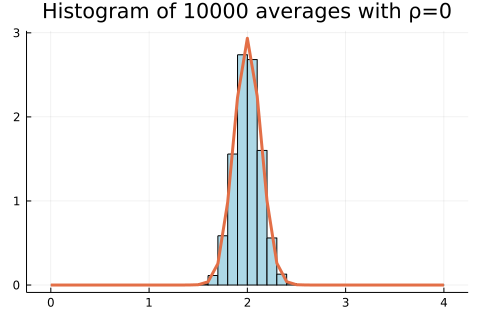

In [9]:
## 4
xGrid000 = 0:0.1:4
p000 = histogram(M000,
                bins = xGrid000,
                normalize = true,
                fillcolor = :lightblue,
                legend = false, 
                title = "Histogram of 10000 averages with ρ=0")

pdfX000  = pdf.(Normal(mean(M000),std(M000)),xGrid000)
plot!(xGrid000, pdfX000, linewidth=3)

display(p000)

# Task 3

Redo task 2, but now use  `ρ=0.75` (the other parameters are unchanged).

In [10]:
## 1
(T,ρ,σ,μ) = (500,0.75,3,2)
M075 = [mean(SimAR1(T,ρ,σ,μ)) for i=1:10000]

10000-element Vector{Float64}:
 1.6989388902107556
 2.8783631323751906
 2.1724689215462445
 1.6224272753349398
 2.627607025755942
 1.5253665331461703
 1.0744674791854685
 1.4614257259413144
 2.0528883237953566
 1.9488746211343966
 ⋮
 2.8295488993878566
 2.126244227985351
 1.3160225472784137
 2.3549622198595657
 2.608144001579233
 1.595115400216176
 2.449317537158864
 1.6906376504337315
 1.6062230909243738

In [11]:
## 2
avgMean075 = mean(M075)
println("Average across the simulations:  ", round(avgMean075, digits=3))

Average across the simulations:  1.997


In [12]:
## 3
stdMeanSim075 = std(M075)

stdMeanThe075 = std(SimAR1(10000,ρ,σ,μ), corrected=true) / sqrt(500)

println("\nStd across the samples (with ρ=0.75) and in theory:")
printmat([stdMeanSim075 stdMeanThe075],colNames=["simulations","theory"])


Std across the samples (with ρ=0.75) and in theory:
simulations    theory
     0.527     0.201



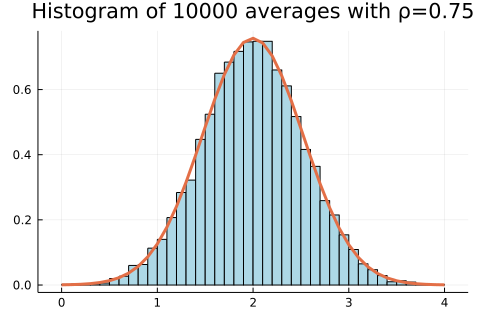

In [13]:
## 4
xGrid075 = 0:0.1:4
p075 = histogram(M075,
                bins = xGrid075,
                normalize = true,
                fillcolor = :lightblue,
                legend = false, 
                title = "Histogram of 10000 averages with ρ=0.75")

pdfX075 = pdf.(Normal(mean(M075),std(M075)),xGrid075)
plot!(xGrid075, pdfX075, linewidth=3)

display(p075)

# Task 4

You decide to test the hypothesis that $\mu=2$. Your decision rule is 

- reject the hypothesis if $|(\mu_i-2)/s|>1.645$ with $s=\sigma_y/\sqrt{T}$

With this decision rule, you are clearly assuming that the theoretical result (definition of $s$) is correct.

Estimate both $\mu_i$ and $\sigma_y$ from each sample.

In what fraction of the $M$ simulation do you reject your hypothesis when $\rho=0$ and when $\rho=0.75$? For the other parameters, use `(T,σ,μ) = (500,3,2)` (same as before).

In [14]:

countP000 = length(M000[broadcast(abs, (M000 .- 2) / stdMeanThe000) .> 1.645])
shareP000 =  countP000 / length(M000)

countP075 = length(M075[broadcast(abs, (M075 .- 2) / stdMeanThe075) .> 1.645])
shareP075 =  countP075 / length(M075)

println("Frequency of rejections:")

printmat([shareP000 shareP075],colNames=["with ρ=0","with ρ=0.75"])

#println(M2[1])

Frequency of rejections:
  with ρ=0with ρ=0.75
     0.103     0.528

